This dataset contains data collected from **Netflix of different TV shows and movies from the year 2008 to 2021**.

* **type**: Gives information about 2 different unique values one is TV Show and another is Movie.
* **title**: Gives information about the title of Movie or TV Show.
* **director**: Gives information about the director who directed the Movie or TV Show
* **cast**: Gives information about the cast who plays role in Movie or TV Show
* **release_year**: Gives information about the year when Movie or TV Show was released
* **rating**: Gives information about the Movie or TV Show are in which category (eg like the movies are only for students, or adults, etc)
* **duration**: Gives information about the duration of Movie or TV Show
* **listed_in**: Gives information about the genre of Movie or TV Show
* **description**: Gives information about the description of Movie or TV Show

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing the dataset
data = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [4]:
#Top 5 rows of the dataset
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#No. of rows and columns
data.shape

(8807, 12)

In [6]:
#Show Column names
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#Datatype of  columns
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
#shows indexes, column name, nonnull count, datatypes of each column and overall memory 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
#checking row wise duplicate records
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* There are no duplicate rows in this dataset.

In [10]:
#Checking null values in each column
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
#column-wise null percentages 
round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

* Director column has ~30% missing values
* Cast has 9.37% missing values
* Country has  9.44% missing values

<Figure size 720x432 with 0 Axes>

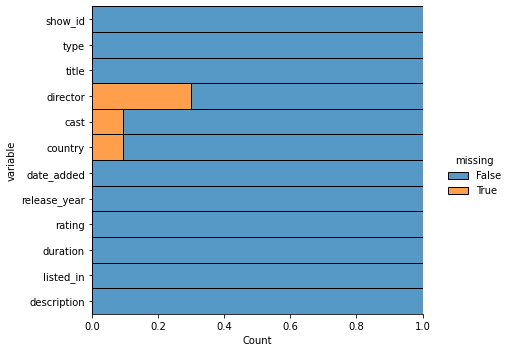

In [12]:
#Visualizing missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

* For missing values in country we will replace with the most common country(mode)
* For cast and director will just add "No data"

In [13]:
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['cast'].replace(np.nan, 'No Data',inplace  = True)
data['director'].replace(np.nan, 'No Data',inplace  = True)
data.dropna(inplace=True)



In [14]:
#adding a new date column as per date_added
data['date_added'] = pd.to_datetime(data['date_added'])

data['month_added']=data['date_added'].dt.month
data['month_name_added']=data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year


In [15]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


In [16]:
data.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                  int64
month_name_added            object
year_added                   int64
dtype: object

In [17]:
#year in which maximum no. of TV shows and movies were added on netflix
data['year_added'].value_counts()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

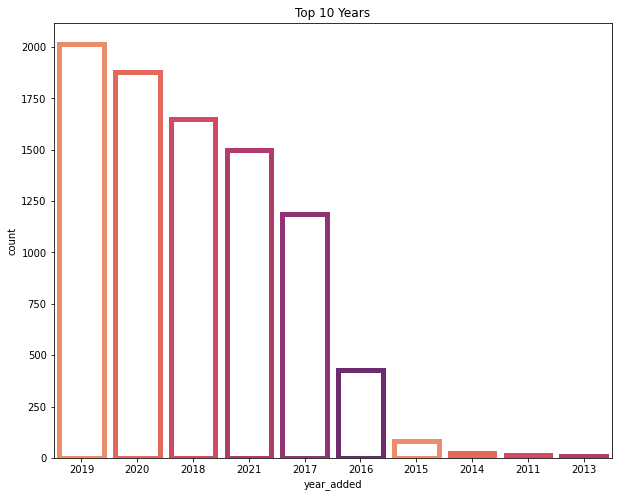

In [18]:
#Top 10 years when maximum movies n TV shows were added
plt.figure(figsize=(10,8))
plt.title('Top 10 Years')
sns.countplot(x='year_added',data=data,order=data['year_added'].value_counts().index[:10],facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("flare"))
plt.show()

In [19]:
#Unique content type
data.groupby('type').type.count()

type
Movie      6126
TV Show    2664
Name: type, dtype: int64

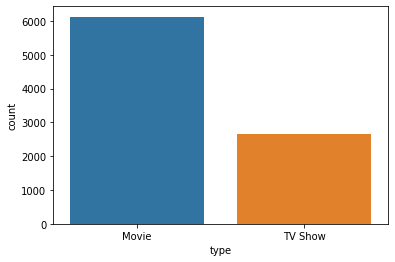

In [20]:
sns.countplot(x='type', data=data)
plt.show()

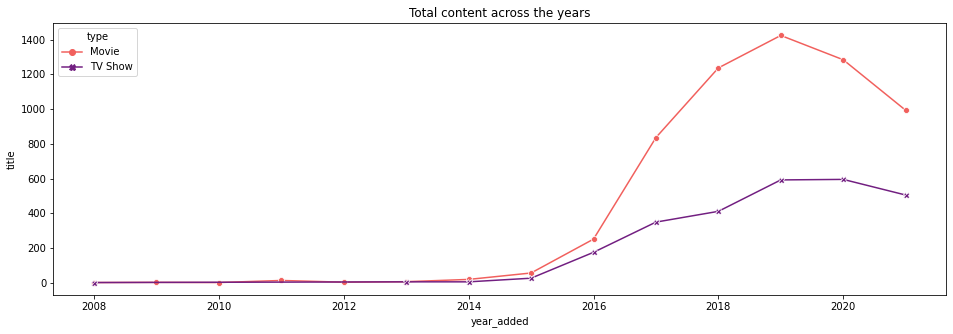

In [21]:
#Checking TV Shows and movies added across the years
type_year = (data.groupby(['type','year_added'])['title'].size()).reset_index()
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = type_year,x = 'year_added',y = 'title',hue = 'type',style = 'type',palette='magma_r',markers=True, dashes=False)
plt.title("Total content across the years")
plt.show()


* Since 2016, the amount of content added has been increasing significantly. 
* The growth in the number of movies on Netflix is much higher than that of TV shows. 

In [22]:
#Top 10 Countries in which movies and TV shows were addded
data['country'].value_counts()[:10]

United States     3638
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

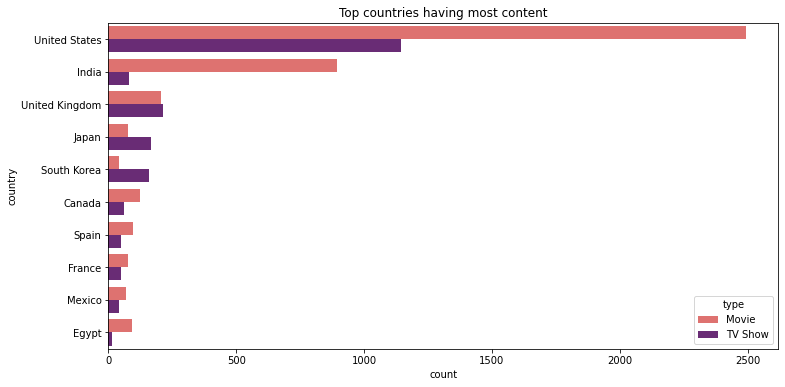

In [23]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = data,y = 'country', order = data["country"].value_counts().index[:10],hue = 'type',palette = 'magma_r')
plt.title("Top countries having most content")
plt.show()

In [24]:
data['director'].value_counts()

No Data                           2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [25]:
#Director as per no. of titles.
director = data[data.director!='No Data'].set_index('title').director.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

In [26]:
director

title
Dick Johnson Is Dead                Kirsten Johnson
Ganglands                           Julien Leclercq
Midnight Mass                         Mike Flanagan
My Little Pony: A New Generation      Robert Cullen
My Little Pony: A New Generation     José Luis Ucha
                                         ...       
Zinzana                             Majid Al Ansari
Zodiac                                David Fincher
Zombieland                          Ruben Fleischer
Zoom                                   Peter Hewitt
Zubaan                                  Mozez Singh
Length: 6974, dtype: object

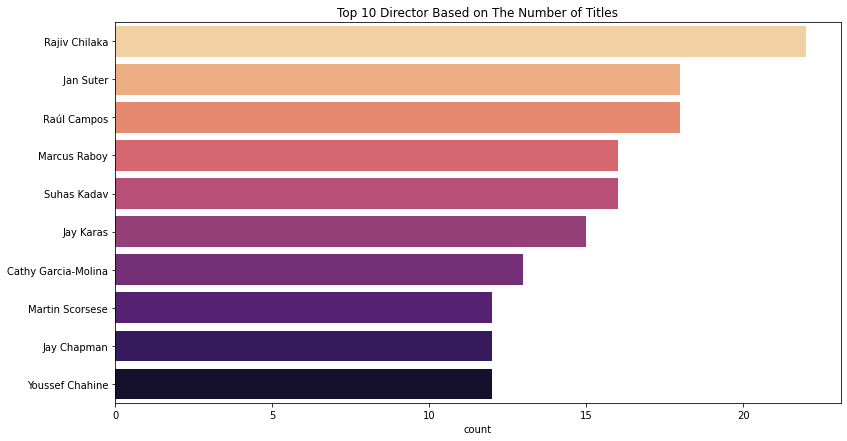

In [27]:
plt.figure(figsize=(13,7))
sns.countplot(y = director, order=director.value_counts().index[:10], palette='magma_r')
plt.title('Top 10 Director Based on The Number of Titles')
plt.show()


In [28]:
#df for TV shows and Movies
tv_shows = data[data.type == 'TV Show'].copy()
movie = data[data.type == 'Movie'].copy()

In [29]:
#Cast as per TV Shows
cast = tv_shows[tv_shows.cast!='No Data'].set_index('title').cast.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

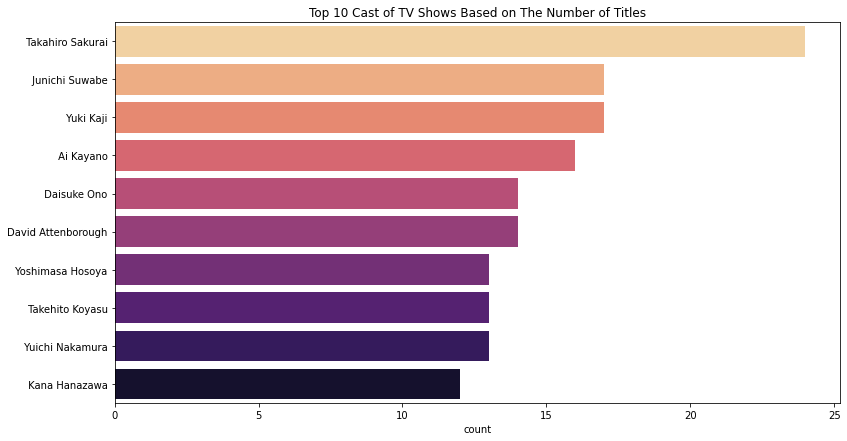

In [30]:
plt.figure(figsize=(13,7))
sns.countplot(y = cast, order=cast.value_counts().index[:10], palette='magma_r')
plt.title('Top 10 Cast of TV Shows Based on The Number of Titles')
plt.show()

* The top actor on Netflix TV Show, based on the number of titles, is Takahiro Sakurai.

In [31]:
#Cast as per Movies
cast_m = movie[movie.cast!='No Data'].set_index('title').cast.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

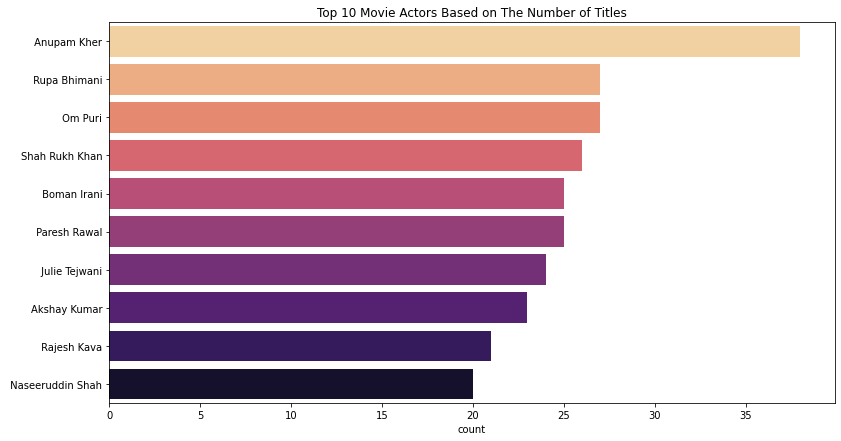

In [32]:
plt.figure(figsize=(13,7))
sns.countplot(y = cast_m, order=cast_m.value_counts().index[:10], palette='magma_r')
plt.title('Top 10 Movie Actors Based on The Number of Titles')
plt.show()

* The top actor on Netflix Movies, based on the number of titles, is Anupam Kher. Also maximum actors are from India

In [33]:
#Check Duration of movies
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021


In [34]:
movie['duration'] = movie['duration'].str.replace(' min','').astype(int)

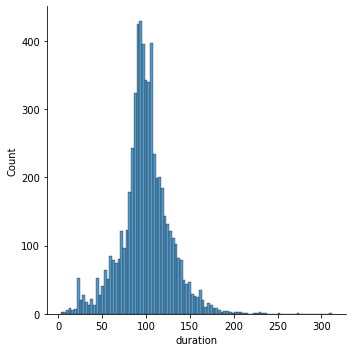

In [35]:
sns.displot(data=movie,x='duration',bins=100)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


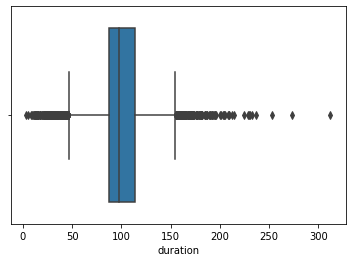

In [36]:
sns.boxplot(movie['duration'])
plt.show()

* The average movie time is 100 mins
* We can see that there are several movies which are less than 50 mins so we can consider them outlier

In [37]:
tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,September,2021


In [38]:
#Removing 'Seasons' word from duration to get only no. of seasons
tv_shows['duration']=tv_shows['duration'].str.split(' ').str[0]

In [39]:
# Changing duration column name to season
tv_shows.rename(columns = {'duration':'season'}, inplace = True)

<AxesSubplot:>

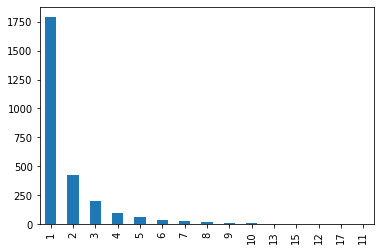

In [40]:
tv_shows['season'].value_counts().plot(kind='bar')

In [41]:
tv_shows['season'].describe()

count     2664
unique      15
top          1
freq      1791
Name: season, dtype: object

* There are total 2664 TV Shows
* ~1800 TV Shows have only one season

In [42]:
#Analysing genre of content
genre = data.set_index('title').listed_in.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

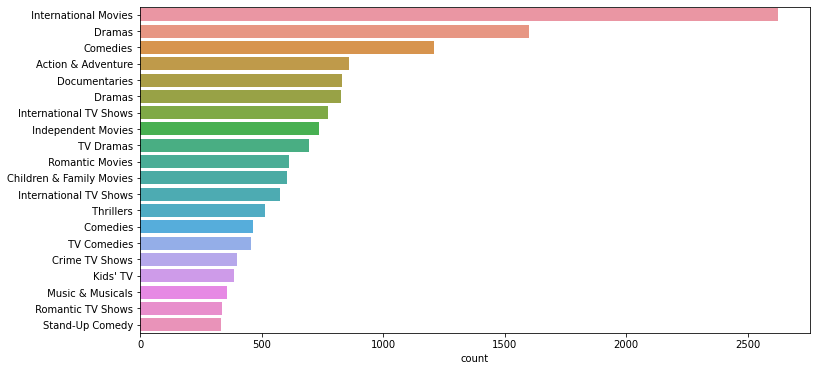

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(y = genre, order=genre.value_counts().index[:20])
plt.show()

* International Movies take the first place, followed by dramas and comedies.